In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df_processed = pd.read_excel("Pre_processed_TG_Logistic.xlsx")
df_processed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status,source
0,5849,0.0,142.579832,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001002,Y,train
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,LP001003,N,train
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,1,0,0,1,0,0,1,LP001005,Y,train
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,1,1,0,0,0,1,LP001006,Y,train
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001008,Y,train


In [4]:
train_pre_processed = df_processed.loc[df_processed['source']=='train']
test_pre_processed = df_processed.loc[df_processed['source']=='test']

In [6]:
train_pre_processed.shape,test_pre_processed.shape

((614, 23), (367, 23))

In [7]:
train_pre_processed.drop(columns=['source'],inplace=True)

C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
train_pre_processed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status
0,5849,0.0,142.579832,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,LP001002,Y
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,LP001003,N
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,LP001005,Y
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,LP001006,Y
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,LP001008,Y


In [12]:
X_train  = train_pre_processed.drop(columns=['Loan_ID','Loan_Status'])
train_Y = train_pre_processed['Loan_Status']


In [13]:
model  = LogisticRegression()
model.fit(X_train,train_Y)
y_predict = model.predict(X_train)
print("Accuracy:",accuracy_score(train_Y,y_predict))


Accuracy: 0.8110749185667753


C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
confusion_matrix(train_Y,y_predict)

array([[ 86, 106],
       [ 10, 412]], dtype=int64)

In [18]:
target = ['approve','notapprove']
print(classification_report(train_Y,y_predict,target_names=target))

              precision    recall  f1-score   support

     approve       0.90      0.45      0.60       192
  notapprove       0.80      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



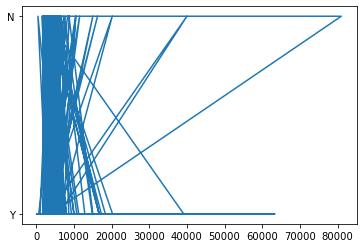

In [20]:
plt.plot(train_pre_processed['ApplicantIncome'],y_predict)

C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

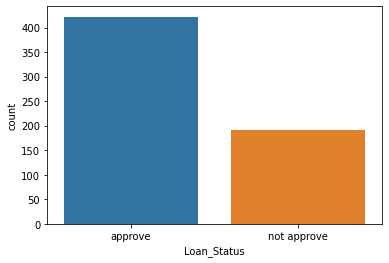

In [23]:
g = sns.countplot(train_pre_processed['Loan_Status'])
g.set_xticklabels(['approve','not approve'])
plt.show

C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

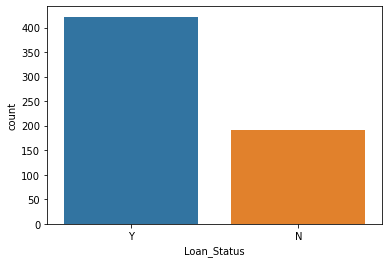

In [24]:
g = sns.countplot(train_pre_processed['Loan_Status'])
#g.set_xticklabels(['approve','not approve'])
plt.show

In [25]:
X_test = test_pre_processed.drop(columns=['Loan_ID','Loan_Status'])
test_y = test_pre_processed['Loan_Status']


In [27]:
X_test.drop(columns=['source'],inplace=True)

In [28]:
Y_pred_test = model.predict(X_test)


In [30]:
Y_pred_test.shape

(367,)

In [31]:
Y_pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [35]:
X_test['Predicted'] = Y_pred_test
X_test['Predicted'].value_counts()

Y    304
N     63
Name: Predicted, dtype: int64

In [36]:
submission = pd.read_csv("D:\\Data Science\\logistic regression\\hackathon\\sample_submission.csv")

In [37]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [39]:
submission.shape

(367, 2)

In [40]:
submission['Loan_Status'] = Y_pred_test

In [41]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [42]:
submission.to_csv("Submission_TG_logitic_regression.csv",index=False)